#### Importando Libs

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Classificador
from sklearn import tree #Tem uma estrutura de árvore que será usada
from sklearn.tree import DecisionTreeClassifier #Classificador que gera uma árvore de regras
from sklearn.ensemble import RandomForestClassifier

# Separação dos dados entre treino e teste.
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#### Coletando Dataset

In [2]:
dados = datasets.load_iris()
dados

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#### Exibindo os Dados

In [3]:
dados['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### Exibindo a feature target

In [4]:
dados['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Nomes das features

In [5]:
dados['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### Nome das classificações da features alvo.

In [6]:
dados['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Regrassão

#### LinearRegression

In [7]:
# Separando as colunas de interesse
X = dados['data']
y = dados['target']
features = dados['feature_names']
targets = dados['target_names']

# separando dados para trino e teste.
# test_size = 0.2 % 20% para teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Criar modelo
lr = LinearRegression()

# treinar modelo.
lr.fit(X_train, y_train)

#Predição dos dados de Teste
y_pred = lr.predict(X_test)

# Verifica os erros.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calcular o R Squared
r2 = r2_score(y_test,y_pred)

#### Resultados.
- MSE
- RMSE
- R2
- Coefficients
- Intercept

In [8]:
# Print de valores.
print("MSE Value: ", round(mse, 2))
print("RMSE Value: ", round(rmse,2))
print("R2 Value: ", round(r2, 2))
print ('Coefficients: ', lr.coef_)
print ('Intercept: ', lr.intercept_)

MSE Value:  0.04
RMSE Value:  0.2
R2 Value:  0.94
Coefficients:  [-0.10753506 -0.05844926  0.2647557   0.52929416]
Intercept:  0.18080804062267852


#### KNeighborsClassifier

In [9]:
# dados de entrada e saida.
X2 = dados['data']
y2 = dados['target']

# Divisao dos dados em treinamento e teste
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 0)

# Definicao do numero de vizinhos de forma arbitraria
# hyper parametros, impacta na performance do modelo. 2 pode ser alterado. numero de cluster.
k = 2

# Criacao do modelo
knn = KNeighborsClassifier(k)

# Treinamento
knn.fit(X_train2,y_train2)

# Teste
y_pred2 = knn.predict(X_test2)

mse2 = mean_squared_error(y_test2, y_pred2)
rmse2 = np.sqrt(mse2)

# Calcular o R Squared
r22 = r2_score(y_test2,y_pred2)

# Avaliando o desempenho
acc_knn = accuracy_score(y_test2,y_pred2)

#### Resultados.
- MSE
- RMSE
- R2
- Resultado da classificação

In [10]:
print("MSE Value: ", round(mse2, 2))
print("RMSE Value: ", round(rmse2,2))
print("R2 Value: ", round(r22, 2))
print("Resultado da classificação:", round(acc_knn,2)*100)

MSE Value:  0.02
RMSE Value:  0.15
R2 Value:  0.96
Resultado da classificação: 98.0


## Classificação

### DecisionTreeClassifier

In [11]:
# Divisao de dados em treinamento e teste
clf = DecisionTreeClassifier(criterion="entropy")
    
baseAtributos = X_train
baseRotulos = y_train

clf.fit(baseAtributos, baseRotulos)

DecisionTreeClassifier(criterion='entropy')

In [12]:
y_pred_tree = clf.predict(X_test)
y_pred_tree

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [13]:
acc_rf_tree = accuracy_score(y_test, y_pred_tree)

#### Resultado

In [14]:
print("Resultado da classificação:", round(acc_rf_tree,2)*100)

Resultado da classificação: 98.0


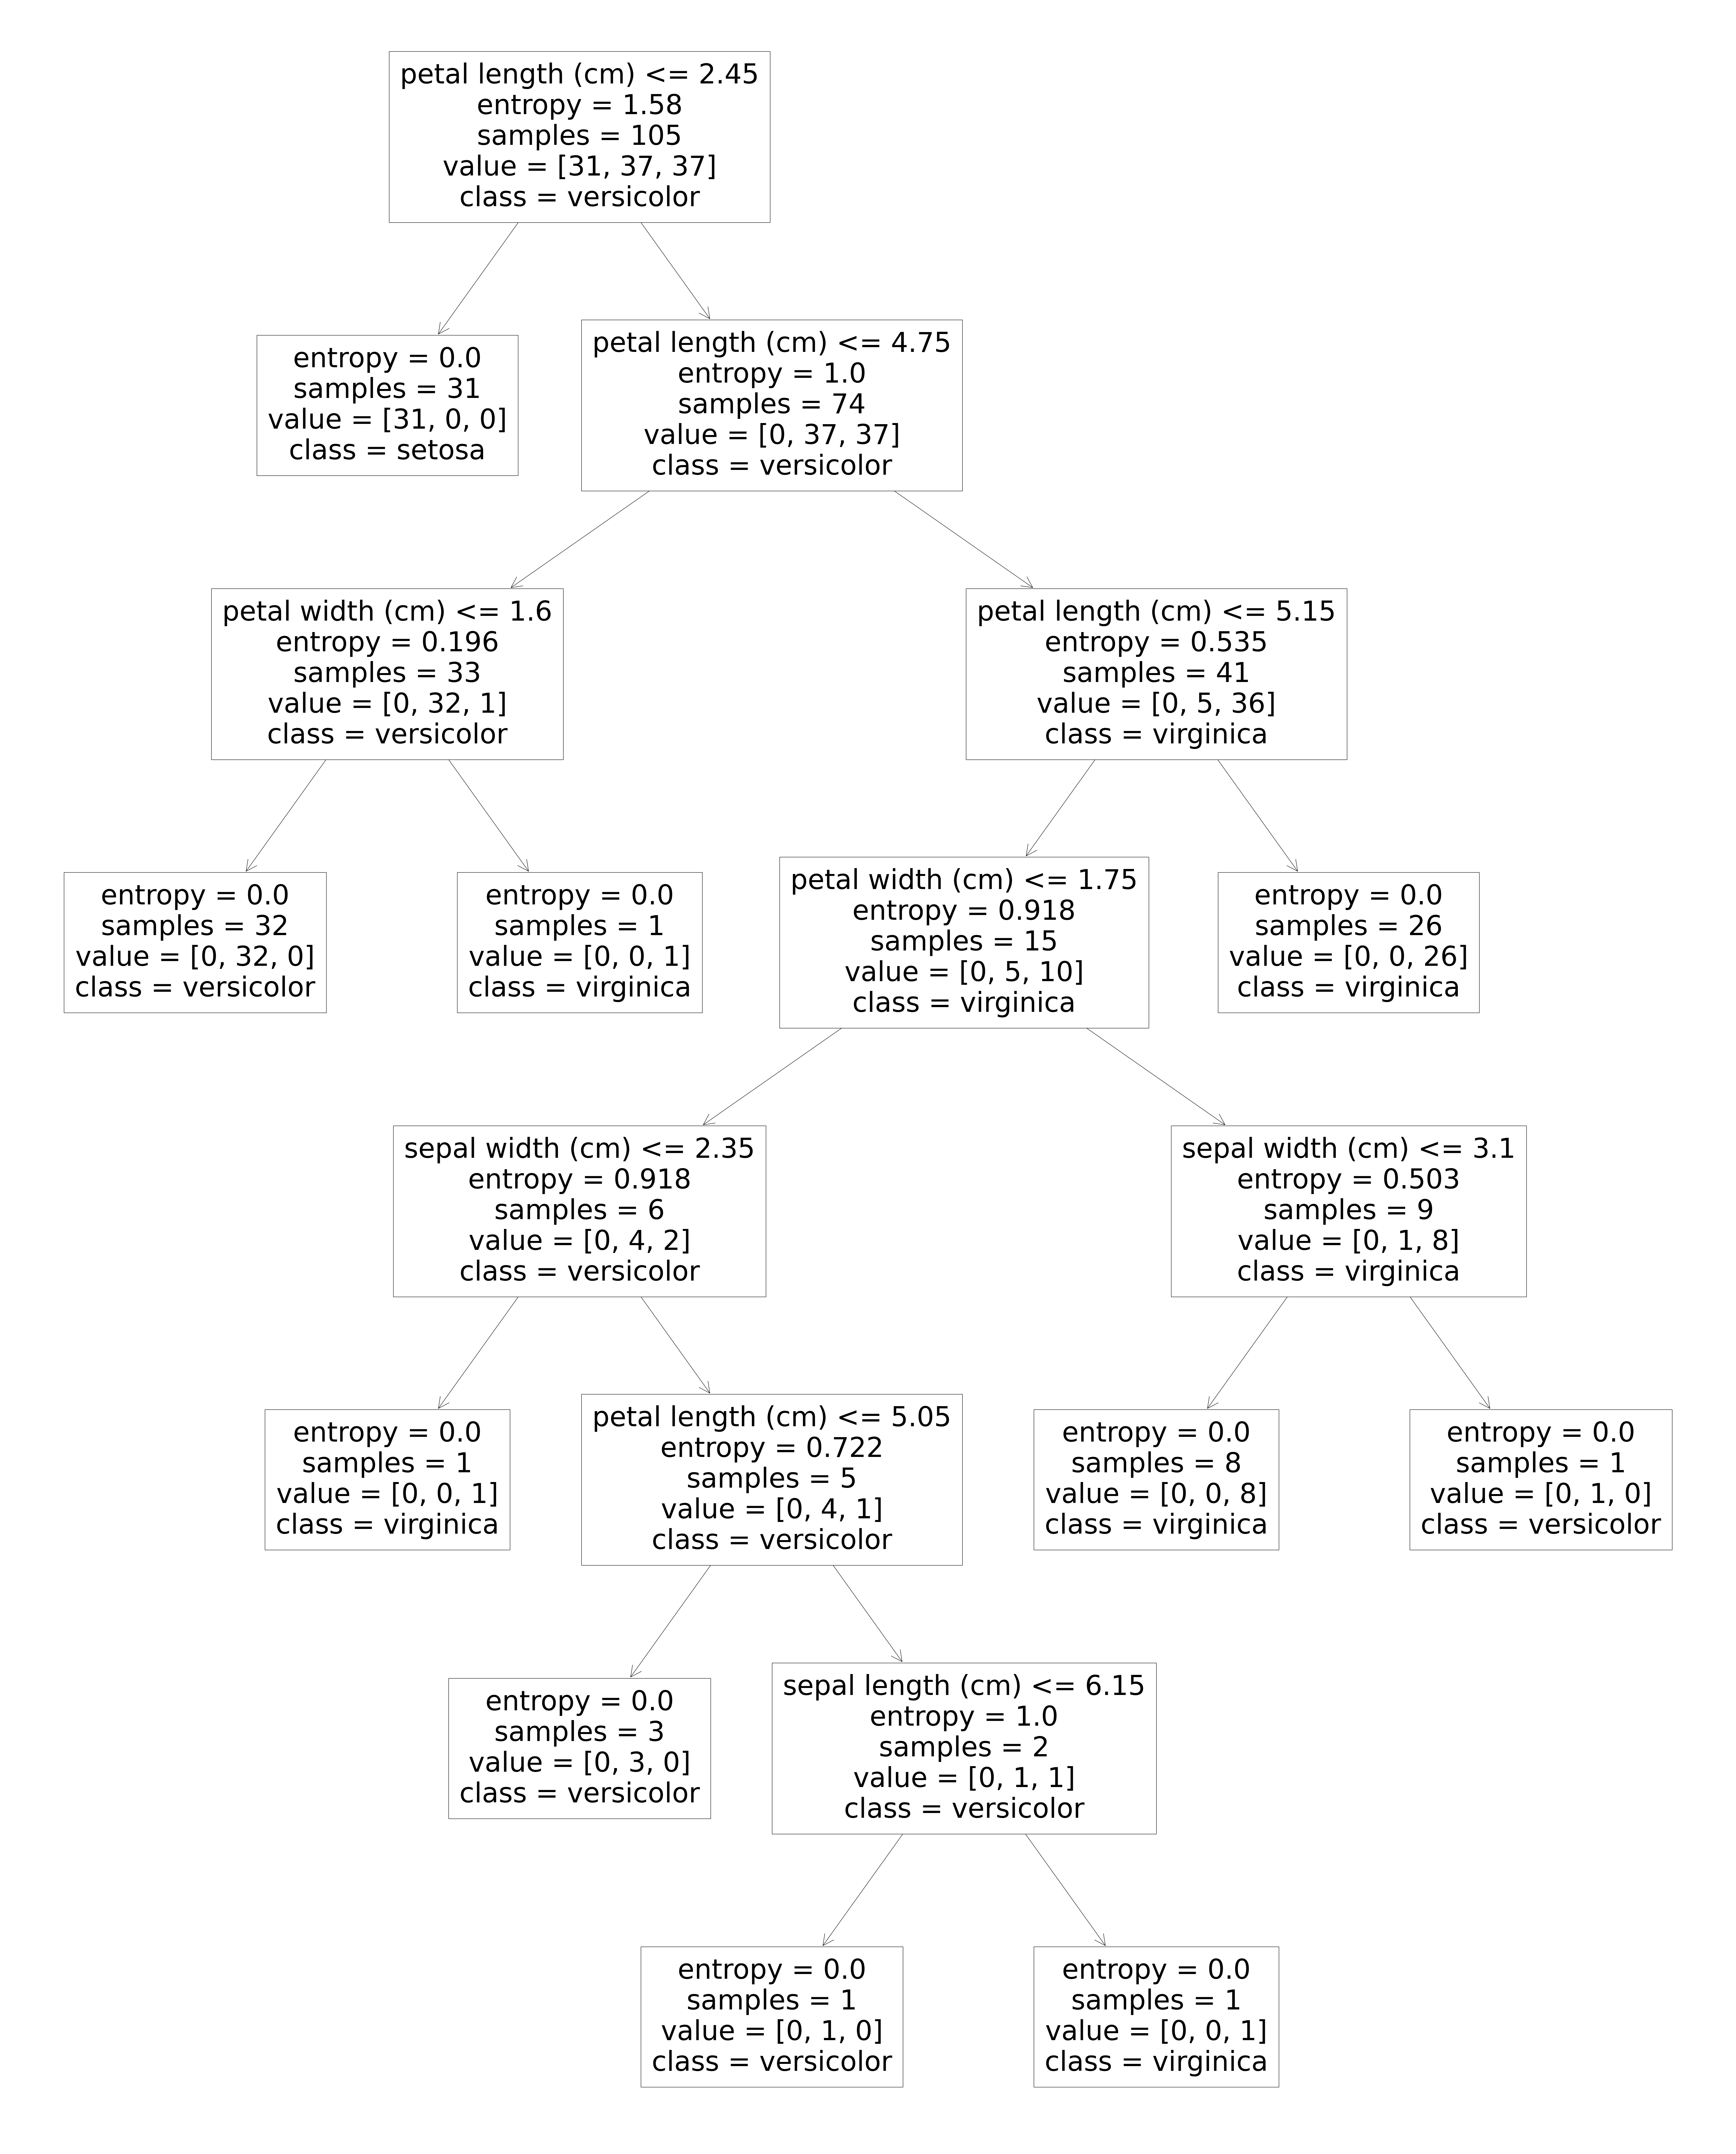

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(80,100))
tree.plot_tree(clf, feature_names=features, class_names=targets,  ax=ax, filled=False)
plt.show()

### RandomForestClassifier

In [16]:
# Criando o modelo
rf = RandomForestClassifier(random_state = 0)

# Treinamento
rf.fit(X_train, y_train)

# Teste
y_predForest = rf.predict(X_test)

# Avaliando o modelo
acc_rf3 = accuracy_score(y_test, y_predForest)

#### Resultado

In [17]:
print("Resultado da classificação:", round(acc_rf3,2)*100)

Resultado da classificação: 100.0
